# MACHINE LEARNING BASED REGRESSION FRAMEWORK TO PREDICT HEALTH INSURANCE PREMIUMS 

## LINEAR REGRESSION AND ARTIFICIAL NEURAL NETWORKS

## IMPORTING NECESSARY LIBRARIES

In [3]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

## IMPORTING AND EXPLORING DATA

In [4]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
# Dimension of the dataset
data.shape 

(1338, 7)

In [7]:
# Information of data in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## EXPLORATORY DATA ANALYSIS

In [8]:
# To view any data is null or not
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
# Relationship between region and expenses
data_region = data.groupby(by = "region").mean(("expenses"))
data_region

,age,bmi,children,expenses
region,,,,
northeast,39.268519,29.176235,1.046296,13406.384691
northwest,39.196923,29.201846,1.147692,12417.575169
southeast,38.939560,33.359341,1.049451,14735.411538
southwest,39.455385,30.596615,1.141538,12346.937908


<p> Seems like SOUTHEAST region has highest BMI and Expenses </p>

In [11]:
# Relationship between age and expenses
data_age = data.groupby(by = "age").mean(("expenses"))
data_age

,bmi,children,expenses
age,,,
18,31.333333,0.449275,7086.217971
19,28.598529,0.426471,9747.909706
20,30.627586,0.862069,10159.697931
21,28.189286,0.785714,4730.464286
22,31.092857,0.714286,10012.932857
23,31.460714,1.000000,12419.820357
24,29.142857,0.464286,10648.015714
25,29.689286,1.285714,9838.365000
26,29.435714,1.071429,6133.825714


<p>As customer age increses, the charges tend to increase as well. This makes sense because as people age, they have more health problems, hence more usage of insurance</p>

## FEATURE ENGINEERING

In [12]:
# To see unique values in 'sex' feature
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [13]:
# To see unique values in 'smoker' feature
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
# Check unique values in 'region' feature
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
# convert categorical variable to numerical
data['sex'] = data['sex'].apply(lambda x:0  if x=='female' else 1) # Male: 1, Female: 0
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1) # Smoker: 1, Non Smoker: 0

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [17]:
# Region feature into 4 different columns
region_dummies = pd.get_dummies(data['region'])
region_dummies

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [18]:
count_0 = region_dummies['northeast'].eq(0).sum()
count_1 = region_dummies['northeast'].eq(1).sum()
print("NORTHEAST: ",count_0, count_1)

count_0 = region_dummies['northwest'].eq(0).sum()
count_1 = region_dummies['northwest'].eq(1).sum()
print("NORTHWEST: ",count_0, count_1)

count_0 = region_dummies['southeast'].eq(0).sum()
count_1 = region_dummies['southeast'].eq(1).sum()
print("SOUTHEAST: ",count_0, count_1)

count_0 = region_dummies['southwest'].eq(0).sum()
count_1 = region_dummies['southwest'].eq(1).sum()
print("SOUTHWEST: ",count_0, count_1)

NORTHEAST:  1014 324
NORTHWEST:  1013 325
SOUTHEAST:  974 364
SOUTHWEST:  1013 325


<p>There are 324+325+364+325 people located un northeast, northwest, southeast, southwest region</p>

In [19]:
# Integrating these column in our dataset
data = pd.concat([data, region_dummies], axis = 1)

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,0,0,0,1
1,18,1,33.8,1,0,southeast,1725.55,0,0,1,0
2,28,1,33.0,3,0,southeast,4449.46,0,0,1,0
3,33,1,22.7,0,0,northwest,21984.47,0,1,0,0
4,32,1,28.9,0,0,northwest,3866.86,0,1,0,0


In [21]:
# Removing Region feature in dataset
data.drop(['region'], axis = 1, inplace = True)

In [22]:
data.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0


In [23]:
data.shape

(1338, 10)

## DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'expenses'}>]], dtype=object)

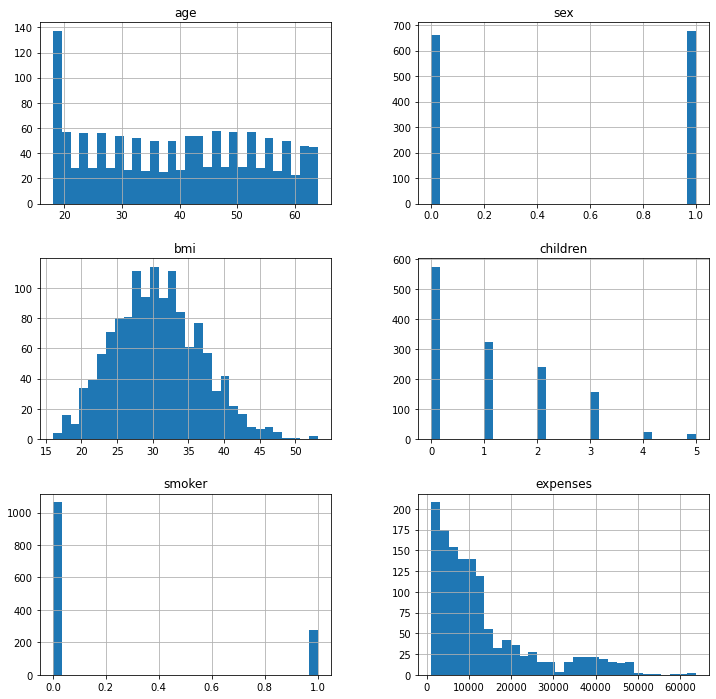

In [24]:
data[ ['age', 'sex', 'bmi', 'children', 'smoker', 'expenses'] ].hist(bins = 30, figsize= (12,12))

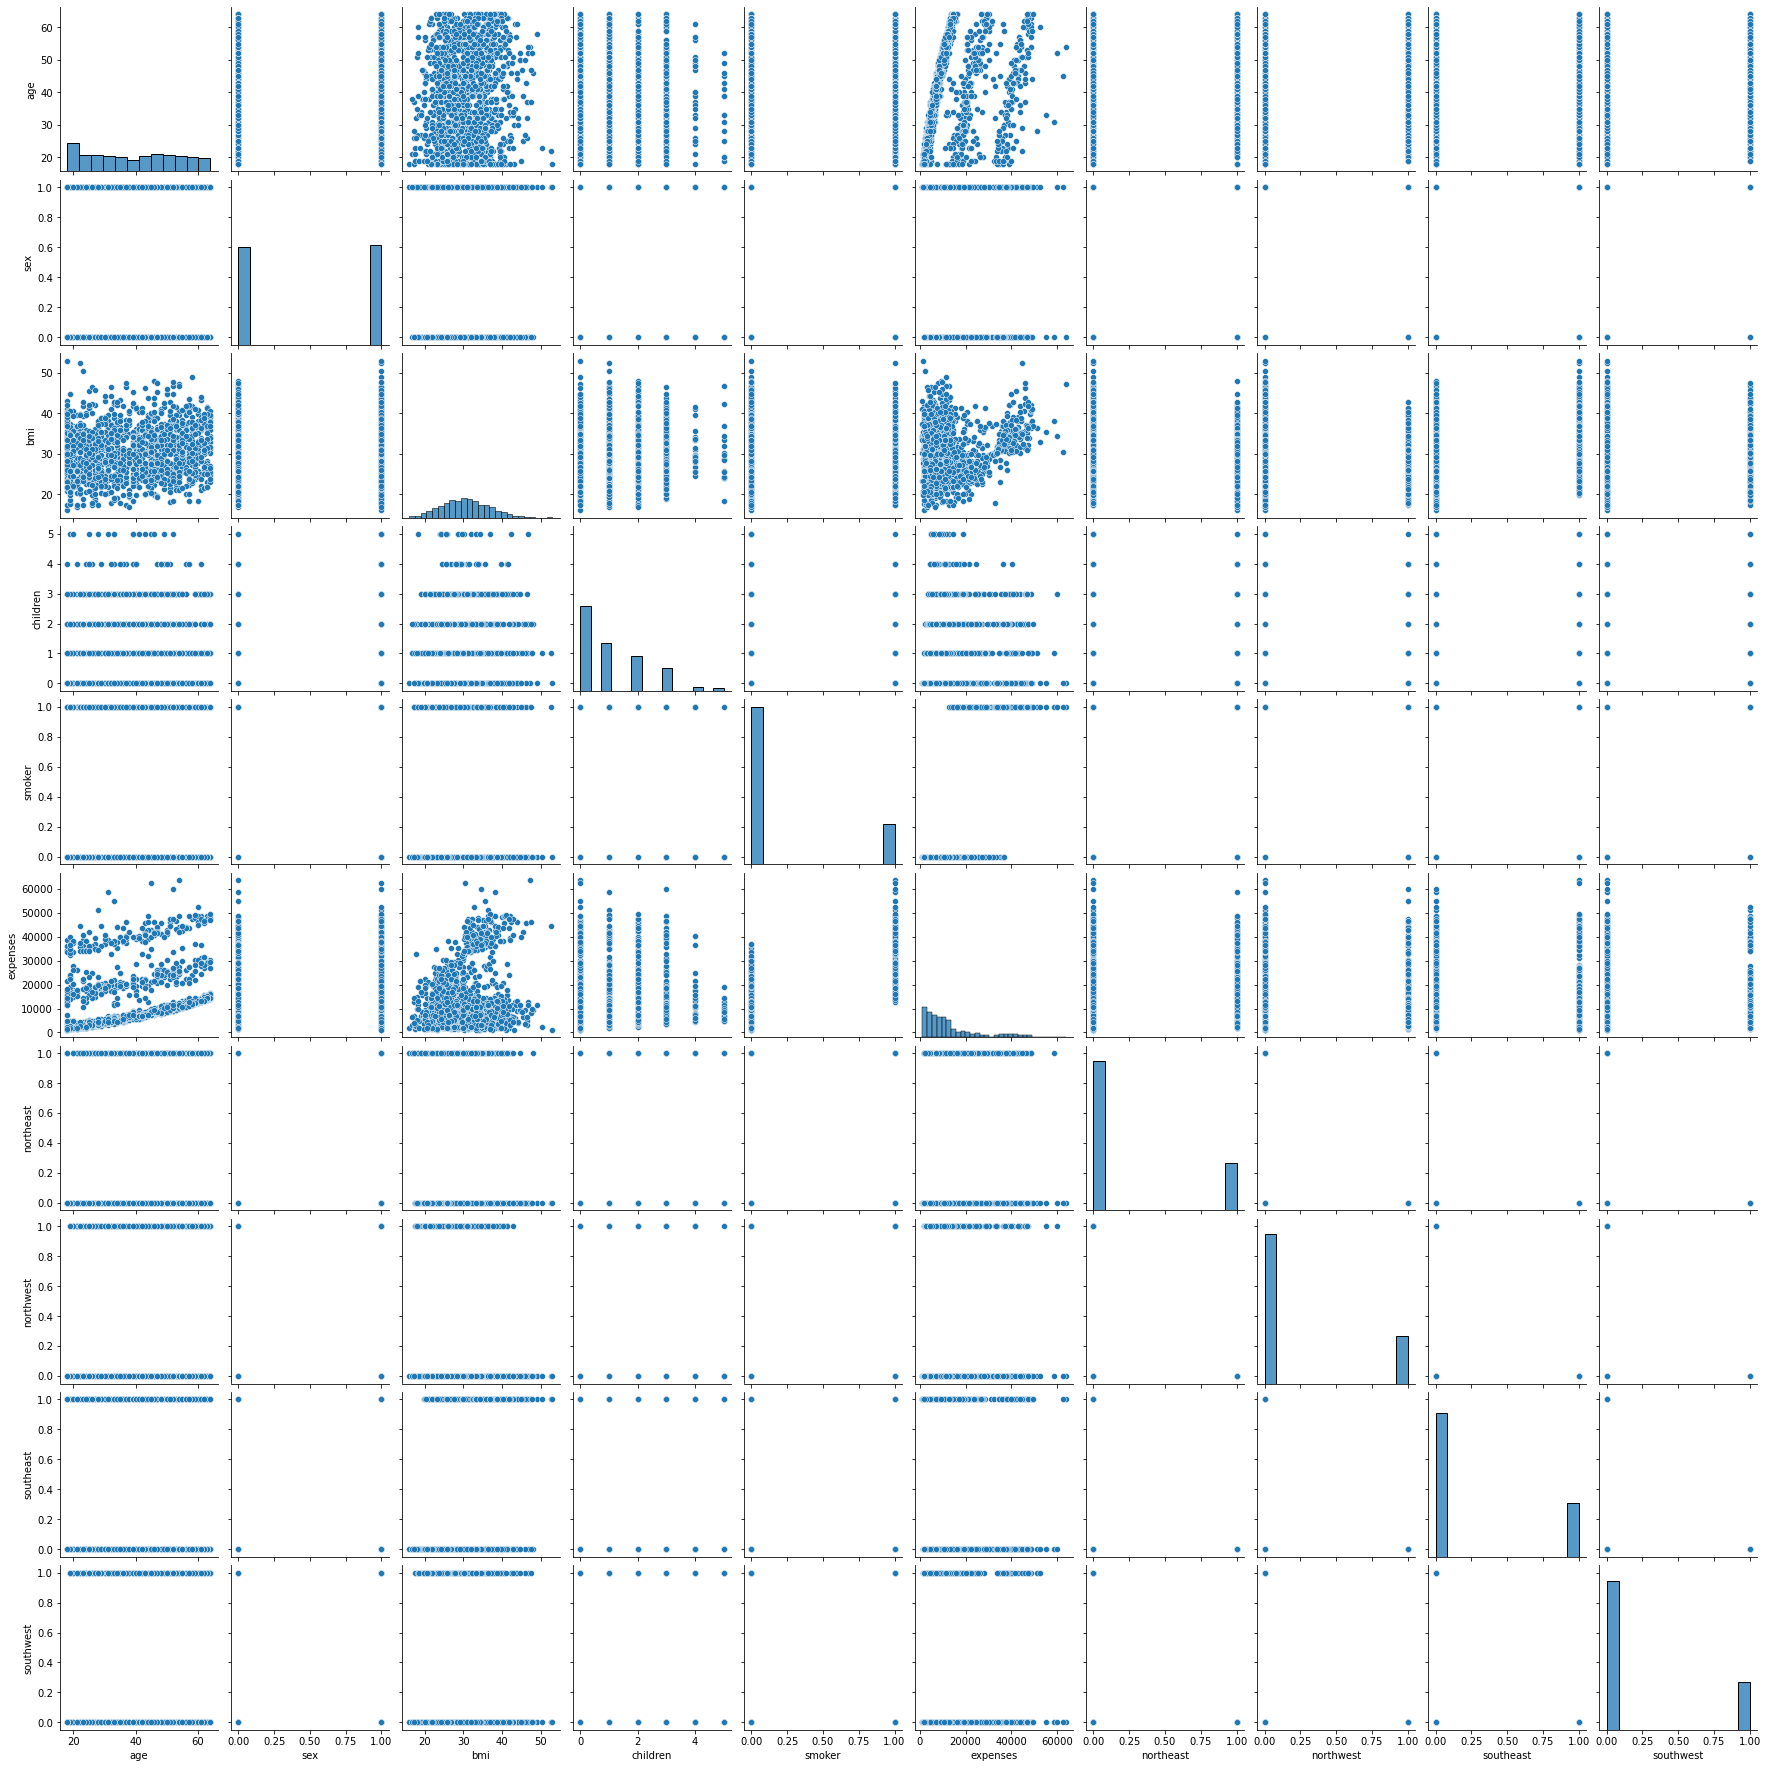

In [25]:
# plot pairplot with seaborn
sns.pairplot(data)

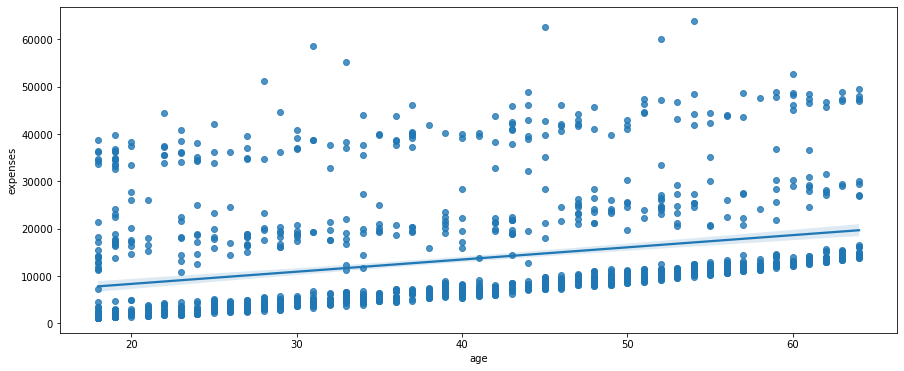

In [26]:
# regression plot age vs expenses
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'expenses', data = data)
plt.show()

<p> As Age increases the Expenses increases as well</p>

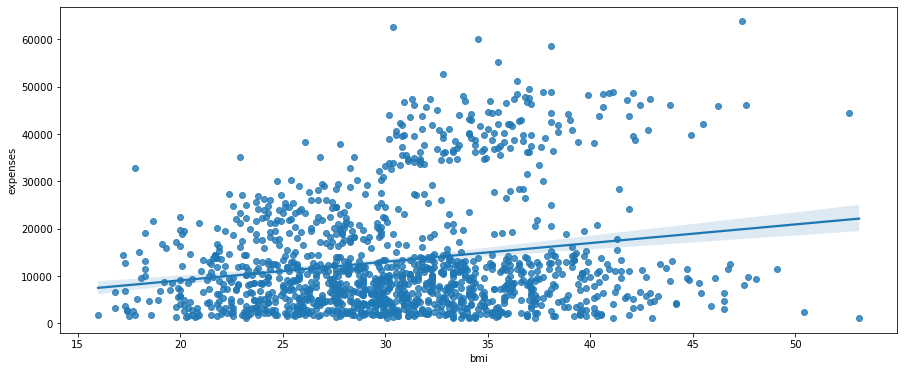

In [27]:
# regression plot of bmi vs expenses
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'expenses', data = data)
plt.show()

<p>As BMI increases, the Expenses tend to increase slightly as well</p>

In [28]:
# To see correlation between the Features
data.corr()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576,-0.138091,-0.135992,0.270144,-0.006398
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138091,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135992,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270144,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006398,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

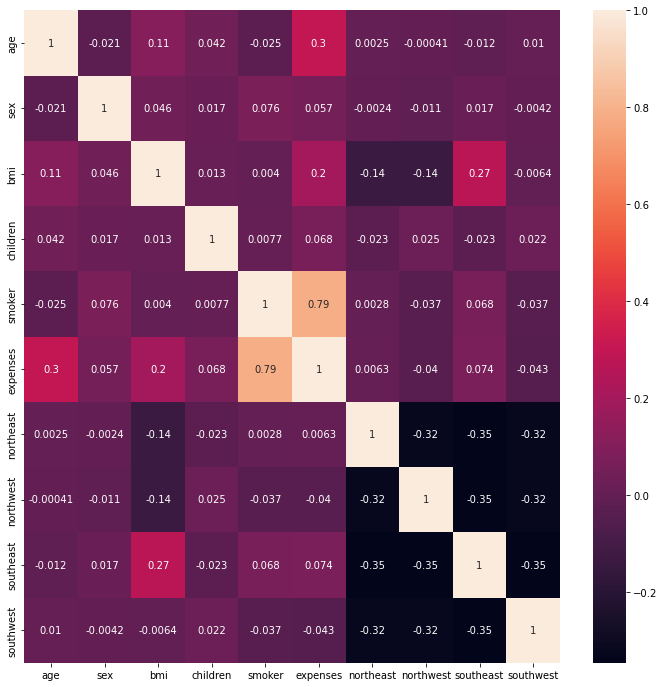

In [30]:
# Correlation visualization
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), annot=True)

<p>Positive correlation between: 
1. smokers and expenses  (79%) - smokers have the highest expenses
2. age and expenses (30%)
3. bmi and expenses (20%)
</p>

## TRAINING AND TESTING DATA

In [31]:
# To see name of the columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'expenses', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [32]:
# divide data into inupts (X) and output (y)
X=data.drop(columns=['expenses'])
y=data['expenses']

In [33]:
print(X.shape, "X_shape")
print(y.shape, "y_shape")

(1338, 9) X_shape
(1338,) y_shape


In [34]:
# converting data into numpy array
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [35]:
X

array([[19. ,  0. , 27.9, ...,  0. ,  0. ,  1. ],
       [18. ,  1. , 33.8, ...,  0. ,  1. ,  0. ],
       [28. ,  1. , 33. , ...,  0. ,  1. ,  0. ],
       ...,
       [18. ,  0. , 36.9, ...,  0. ,  1. ,  0. ],
       [21. ,  0. , 25.8, ...,  0. ,  0. ,  1. ],
       [61. ,  0. , 29.1, ...,  1. ,  0. ,  0. ]], dtype=float32)

In [38]:
y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36],
      dtype=float32)

In [39]:
y.shape

(1338,)

In [40]:
# Reshaping Y. To convert one dimensional array to two dimensional array
y = y.reshape(-1,1)

In [42]:
y.shape

(1338, 1)

In [43]:
# scaling the data before feeding the model
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [47]:
print(X)

[[-1.4387642  -1.0105187  -0.45364577 ... -0.5664179  -0.61132365
   1.765481  ]
 [-1.5099654   0.9895908   0.5141856  ... -0.5664179   1.6357946
  -0.5664179 ]
 [-0.79795355  0.9895908   0.38295436 ... -0.5664179   1.6357946
  -0.5664179 ]
 ...
 [-1.5099654  -1.0105187   1.0227076  ... -0.5664179   1.6357946
  -0.5664179 ]
 [-1.2963619  -1.0105187  -0.7981282  ... -0.5664179  -0.61132365
   1.765481  ]
 [ 1.5516857  -1.0105187  -0.25679857 ...  1.765481   -0.61132365
  -0.5664179 ]]


In [48]:
print(y)

[[ 0.29858345]
 [-0.95368934]
 [-0.7286749 ]
 ...
 [-0.96159655]
 [-0.93036115]
 [ 1.3110534 ]]


In [52]:
# Splitting data into testing and trainings
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state =30)
X_train.shape, y_train.shape

((1070, 9), (1070, 1))

## TRAINING AND EVALUATING A LINEAR REGRESSION MODEL

In [53]:
# Fitting LR model
linear_reg = LinearRegression()
linear_reg.fit (X_train, y_train)

LinearRegression()

In [54]:
# Checking the accuracy of linear regression model
linear_reg_accuracy = linear_reg.score(X_test, y_test)
linear_reg_accuracy

0.7600402516715419

<p> The accuracy basically in case of Regression is R2(coefficient of determination)</p>

In [55]:
# Prediction
y_predict = linear_reg.predict(X_test)

In [56]:
print(y_predict)

[[ 1.8730721 ]
 [-0.6367467 ]
 [-0.64358264]
 [ 1.0993905 ]
 [-0.04397329]
 [-0.50632244]
 [-0.63376385]
 [-0.28342202]
 [ 1.6943612 ]
 [-0.15183023]
 [-0.46536002]
 [-0.2832311 ]
 [ 1.7851815 ]
 [-0.13498452]
 [-0.9208732 ]
 [ 1.8337655 ]
 [-0.13156655]
 [-0.32858804]
 [ 1.2763392 ]
 [-0.19186929]
 [-0.9704338 ]
 [-0.35910562]
 [-0.47024283]
 [-0.14963296]
 [ 1.6196009 ]
 [ 2.1279018 ]
 [ 0.15285727]
 [-0.760717  ]
 [-0.16452554]
 [ 0.19680259]
 [-0.9147697 ]
 [ 1.4394251 ]
 [-0.9194084 ]
 [ 0.12307211]
 [-0.07961783]
 [-0.3781486 ]
 [-0.9316686 ]
 [-0.51413494]
 [-1.030004  ]
 [-0.4033483 ]
 [-0.46140054]
 [ 1.7778573 ]
 [-0.82907635]
 [ 0.13283774]
 [-0.23557046]
 [ 1.4045663 ]
 [-0.58981854]
 [-0.8625236 ]
 [-0.85251385]
 [-0.56638104]
 [-0.16799672]
 [-0.04611735]
 [-0.10744986]
 [-0.97458416]
 [-0.1738561 ]
 [-0.4233146 ]
 [ 1.5659432 ]
 [-0.8000236 ]
 [ 0.03322836]
 [-0.6191154 ]
 [ 0.14108531]
 [-0.18845132]
 [-0.14352944]
 [-0.42355874]
 [-1.1325431 ]
 [-0.43625405]
 [-0.18845

In [57]:
# To get charges in it's original values before scaling was applied
y_predict_orig = scaler_y.inverse_transform(y_predict)  
y_test_orig = scaler_y.inverse_transform(y_test)

In [60]:
y_predict_orig.shape

(268, 1)

In [61]:
y_test_orig.shape

(268, 1)

In [62]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [63]:
k

9

In [64]:
# Evaluating Linear Regression Model
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig) 
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 6083.956 
MSE = 37014520.0 
MAE = 4189.0903 
R2 = 0.7600402398208189 
Adjusted R2 = 0.7516695505122428


## TRAINING AND EVALUATING ANN MODEL

In [65]:
# Initializes sequential model, we can add layers one by one
ANN_model = keras.Sequential()

# Add the first hidden layer with 50 neurons and input dimension of 9
# Activation function - rectified linear units(relu) to introduce non-linearity to network
ANN_model.add(Dense(50, input_dim = 9))  
ANN_model.add(Activation('relu')) 

# Add the second hidden layer with 150 neurons
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))

# Add the third hidden layer with 150 neurons
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))

# Add the fourth hidden layer with 50 neurons
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))

# Output layer with 1 neuron
ANN_model.add(Dense(1)) 

# Compiling the model using Mean Squared Error (MSE) loss and the Adam optimizer
ANN_model.compile(loss = 'mse', optimizer = 'adam')

# Display a summary of the model architecture
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                7

In [66]:
# Keep track of loss or error (starts high but goes down as the model is being trained)
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size= 20, validation_split= 0.2)

Epoch 1/100
43/43 [==============================] - 1s 7ms/step - loss: 0.3596 - val_loss: 0.2248
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1721 - val_loss: 0.1897
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1536 - val_loss: 0.1886
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1391 - val_loss: 0.1811
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1343 - val_loss: 0.1849
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1302 - val_loss: 0.1757
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1242 - val_loss: 0.1685
Epoch 8/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1291 - val_loss: 0.1966
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1286 - val_loss: 0.1846
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1171 - val_loss: 0.1643
Epoch 11/

43/43 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.2131
Epoch 84/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0305 - val_loss: 0.2072
Epoch 85/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0331 - val_loss: 0.2264
Epoch 86/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0323 - val_loss: 0.2267
Epoch 87/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0307 - val_loss: 0.2250
Epoch 88/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0333 - val_loss: 0.2185
Epoch 89/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0355 - val_loss: 0.2286
Epoch 90/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0365 - val_loss: 0.2193
Epoch 91/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0299 - val_loss: 0.2122
Epoch 92/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.2167
Epoch 93/100


In [67]:
#Evaluate the results of the trained model
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 2ms/step - loss: 0.2352
Accuracy : 0.764819785952568


In [68]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

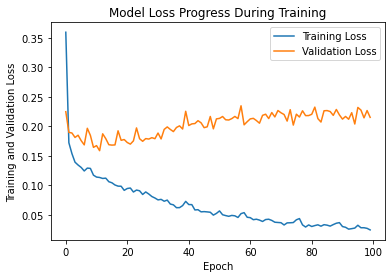

In [69]:
# Visualizing model loss during training
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 [==============================] - 0s 3ms/step


Text(0, 0.5, 'True Values')

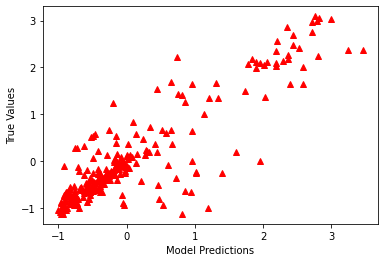

In [70]:
#comparing the y_test to the model predictions (y_predict)
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [71]:
# To get original value
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

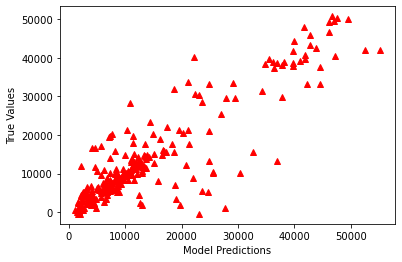

In [72]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [73]:
# Evaluation metrices for ANN
k = X_test.shape[1]
n = len(X_test)
n

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 5870.601 
MSE = 34463956.0 
MAE = 3426.323 
R2 = 0.7765751697634726 
Adjusted R2 = 0.768781280336617


<h1>INFERENCE</h1>

<p> The R2 of Linear Regression model is 0.760040 </p>
<p> The R2 of ANN model is 0.776575 </p>
<p> The accuracy in ANN model is slightly higher than the Linear Regression model</p>

<h3> The comparision of other four Evaluation metrices </h3>

<p> <b>For Linear Regression Model</b> </p>
<li>RMSE = 6083.956</li>
<li>MSE = 37014520.0</li>
<li>MAE = 4189.0903</li>
<li>Adjusted R2 = 0.7516695505122428</li>
 
<p> <b>For ANN model</b> </p>
<li>RMSE = 5870.601</li>
<li>MSE = 34463956.0</li>
<li>MAE = 3426.323</li>
<li>Adjusted R2 = 0.768781280336617</li>


<p> From the above conclusion, for ANN model RMSE, MSE, MAE is comparatively lower than Linear Regression model. It indicates, ANN model is performing well that Linear Regression model. Additionally adjusted R2 value is also higher in ANN model.  So our inference is ANN model is performing better than Linear Regression model for the give dataset </p>
